In [2]:
%matplotlib inline
#import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
%matplotlib inline 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LinearRegression #le modèle 
from sklearn.preprocessing import MinMaxScaler # pour effectuer la normalisations min-max
from sklearn.compose import make_column_transformer # Applique des transformateurs aux colonnes d'un tableau
from sklearn.pipeline import make_pipeline #  une fonction utilitaire qui est un raccourci pour construire des pipelines  

df = pd.read_csv('triplets_metadata_spotify.csv')
df.head(5)

,Unnamed: 0,user,listening_count,song_name,release,artist_name,duration,artist_familiarity,artist_hotttnesss,year,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,...,-7.933,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24
1,1,9fba771d9731561eba47216f6fbfc0023d88641b,19,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,...,-7.933,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24
2,2,85952991b8e3ca5803a08b0b2f9c6d71abf9bb5b,1,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,...,-7.933,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24
3,3,537340ff896dea11328910013cfe759413e1eeb3,2,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,...,-7.933,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24
4,4,8fce200f3912e9608e3b1463cdb9c3529aab5c08,2,Stronger,Graduation,Kanye West,311.84934,0.877214,1.082503,2007,...,-7.933,0,0.176,0.00763,0.0,0.526,0.495,103.977,4.0,2011-05-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982520 entries, 0 to 4982519
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   user                object 
 2   listening_count     int64  
 3   song_name           object 
 4   release             object 
 5   artist_name         object 
 6   duration            float64
 7   artist_familiarity  float64
 8   artist_hotttnesss   float64
 9   year                int64  
 10  shs_perf            int64  
 11  shs_work            int64  
 12  explicit            bool   
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      floa

In [4]:

# Filtrer les utilisateurs ayant au moins 10 écoutes
df_filtered = df.groupby('user').filter(lambda x: len(x) >= 10)

# Sélectionner 3000 lignes aléatoires
df_1 = df_filtered.sample(n=3000, random_state=42)

# Afficher le DataFrame df_1
df_1.head()


,Unnamed: 0,user,listening_count,song_name,release,artist_name,duration,artist_familiarity,artist_hotttnesss,year,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date
2587424,2587424,e804468b6987af254075621361c103aeca4b381d,2,(The Forgotten People),Radio Retaliation,Thievery Corporation,190.79791,0.778080,0.561861,2008,...,-6.099,1,0.0718,0.016600,0.853000,0.0508,0.644,97.537,4.0,2008-09-23
288571,288571,2bad95289080ae41c70fc6e635a5d48e1076cb63,1,Twilight Galaxy,Fantasies,Metric,293.45914,0.801681,0.602034,2009,...,-12.517,0,0.0332,0.905000,0.000026,0.0954,0.112,131.672,4.0,2009-10-27
3331072,3331072,de56e25483bd839266a48c8ad43df26415051ee4,2,Scraping Past,Let The Blind Lead Those Who Can See But Canno...,Atlas Sound,270.96771,0.760148,0.505805,2008,...,-7.747,1,0.0402,0.000036,0.928000,0.0987,0.590,119.749,4.0,2008-02-18
3627580,3627580,22477f93b19739b1ac354534cc679d123a6f8668,1,Over Now,Alice In Chains,Alice In Chains,423.62730,0.796337,0.582922,1995,...,-10.054,0,0.0342,0.174000,0.074700,0.3550,0.302,106.640,4.0,1995-10-30
2028614,2028614,4a08710ce98f07dbfb6b90489fd0f45e2e3d324f,1,Do Your Thing,Rooty,Basement Jaxx,283.01016,0.803619,0.531213,2001,...,-5.512,0,0.0439,0.011300,0.592000,0.3270,0.841,124.878,4.0,2001-06-25


In [5]:

# Sélectionner les colonnes numériques
num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les données
df_1[num_cols] = scaler.fit_transform(df_1[num_cols])

# Afficher les cinq premières lignes du DataFrame normalisé
df_1.head()

,Unnamed: 0,user,listening_count,song_name,release,artist_name,duration,artist_familiarity,artist_hotttnesss,year,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date
2587424,0.519294,e804468b6987af254075621361c103aeca4b381d,0.009009,(The Forgotten People),Radio Retaliation,Thievery Corporation,0.114723,0.778287,0.519039,0.999005,...,0.753183,1.0,0.053236,0.016732,0.860747,0.030235,0.639858,0.292900,0.75,2008-09-23
288571,0.057794,2bad95289080ae41c70fc6e635a5d48e1076cb63,0.000000,Twilight Galaxy,Fantasies,Metric,0.189866,0.809204,0.556150,0.999502,...,0.572001,0.0,0.011385,0.912298,0.000027,0.075945,0.101669,0.493259,0.75,2009-10-27
3331072,0.668583,de56e25483bd839266a48c8ad43df26415051ee4,0.009009,Scraping Past,Let The Blind Lead Those Who Can See But Canno...,Atlas Sound,0.173403,0.754796,0.467255,0.999005,...,0.706660,1.0,0.018974,0.000035,0.936428,0.079328,0.585230,0.423275,0.75,2008-02-18
3627580,0.728108,22477f93b19739b1ac354534cc679d123a6f8668,0.000000,Over Now,Alice In Chains,Alice In Chains,0.285143,0.802204,0.538494,0.992537,...,0.641532,0.0,0.012469,0.175402,0.075378,0.342011,0.293880,0.346331,0.75,1995-10-30
2028614,0.407112,4a08710ce98f07dbfb6b90489fd0f45e2e3d324f,0.000000,Do Your Thing,Rooty,Basement Jaxx,0.182218,0.811744,0.490727,0.995522,...,0.769754,0.0,0.022986,0.011389,0.597376,0.313314,0.839150,0.453381,0.75,2001-06-25


In [6]:
# Convert 'user', 'artist_name', and 'song_name' columns to numeric labels
df_1['user'] = pd.factorize(df_1['user'])[0]
df_1['artist_name'] = pd.factorize(df_1['artist_name'])[0]
df_1['song_name'] = pd.factorize(df_1['song_name'])[0]
df_1['release'] = pd.factorize(df_1['release'])[0]
df_1.head()


,Unnamed: 0,user,listening_count,song_name,release,artist_name,duration,artist_familiarity,artist_hotttnesss,year,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date
2587424,0.519294,0,0.009009,0,0,0,0.114723,0.778287,0.519039,0.999005,...,0.753183,1.0,0.053236,0.016732,0.860747,0.030235,0.639858,0.292900,0.75,2008-09-23
288571,0.057794,1,0.000000,1,1,1,0.189866,0.809204,0.556150,0.999502,...,0.572001,0.0,0.011385,0.912298,0.000027,0.075945,0.101669,0.493259,0.75,2009-10-27
3331072,0.668583,2,0.009009,2,2,2,0.173403,0.754796,0.467255,0.999005,...,0.706660,1.0,0.018974,0.000035,0.936428,0.079328,0.585230,0.423275,0.75,2008-02-18
3627580,0.728108,3,0.000000,3,3,3,0.285143,0.802204,0.538494,0.992537,...,0.641532,0.0,0.012469,0.175402,0.075378,0.342011,0.293880,0.346331,0.75,1995-10-30
2028614,0.407112,4,0.000000,4,4,4,0.182218,0.811744,0.490727,0.995522,...,0.769754,0.0,0.022986,0.011389,0.597376,0.313314,0.839150,0.453381,0.75,2001-06-25


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 2587424 to 3240136
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3000 non-null   float64
 1   user                3000 non-null   int64  
 2   listening_count     3000 non-null   float64
 3   song_name           3000 non-null   int64  
 4   release             3000 non-null   int64  
 5   artist_name         3000 non-null   int64  
 6   duration            3000 non-null   float64
 7   artist_familiarity  3000 non-null   float64
 8   artist_hotttnesss   3000 non-null   float64
 9   year                3000 non-null   float64
 10  shs_perf            3000 non-null   float64
 11  shs_work            3000 non-null   float64
 12  explicit            3000 non-null   bool   
 13  danceability        3000 non-null   float64
 14  energy              3000 non-null   float64
 15  key                 3000 non-null   float64
 1

In [8]:
# On affiche le nombre d'occurences de chaque poste
display(df_1['user'].value_counts())


2314    2
277     2
779     2
2052    2
494     2
       ..
999     1
1000    1
1001    1
1002    1
2959    1
Name: user, Length: 2960, dtype: int64

In [9]:
# Création une variable data dont laquelle vous stockez les features
data = df_1.iloc[:, 2:25]
# Stockage les données cibles dans la variable target
target = df_1.iloc[:, 1]
# sélection des variables catégorielles
categoriel = ['user','song_name','release','artist_name']  
transformer = make_column_transformer((OneHotEncoder(),categoriel))

In [10]:

# Décomposition des données en deux ensembles d'entraînement et de test
# par défaut l'échantillon est aléatoirement réparti
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)



In [11]:
scaler = preprocessing.StandardScaler()

X_train[X_train.columns] = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)

X_test[X_test.columns] = pd.DataFrame(scaler.transform(X_test), index=X_test.index)


In [12]:
model_1 = LinearRegression()
model_1.fit(X_train[['artist_name']], y_train)


LinearRegression()

In [13]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
print('score train :',model_1.score(X_train[['artist_name']], y_train))
print('score test :', model_1.score(X_test[['artist_name']], y_test))


pred = model_1.predict(X_train[['artist_name']])
pred_test = model_1.predict(X_test[['artist_name']])
print('rmse train :', np.sqrt(mean_squared_error(y_train, pred)))
print('rmse test : ', np.sqrt(mean_squared_error(y_test, pred_test)))


score train : 0.09351061340318056
score test : 0.07428804247829435


NameError: name 'mean_squared_error' is not defined

In [14]:
# Création tableau X_train_scaled, contenant les données centrées réduites de X_train

X_train_scaled = preprocessing.scale(X_train)

#Affichage 

print(X_train_scaled.mean(axis=0))
 
print(X_train_scaled.std(axis=0))


[-1.77635684e-17  3.10862447e-17  2.36847579e-17  1.33226763e-17
  8.14163551e-18  1.18423789e-17  4.44089210e-18  4.88498131e-17
  5.92118946e-17 -1.48029737e-17  1.18423789e-17 -2.36847579e-17
  1.48029737e-17 -2.07241631e-17 -9.62193288e-18 -1.03620816e-17
  2.96059473e-18  5.18104078e-17 -1.48029737e-18  8.88178420e-18
 -2.44249065e-17 -3.62672855e-17 -3.99680289e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# Affichage de  la moyenne et l'écart type des colonnes de X_train_scaled.

print(X_train_scaled.mean(axis=0))
 
print(X_train_scaled.std(axis=0))



[-1.77635684e-17  3.10862447e-17  2.36847579e-17  1.33226763e-17
  8.14163551e-18  1.18423789e-17  4.44089210e-18  4.88498131e-17
  5.92118946e-17 -1.48029737e-17  1.18423789e-17 -2.36847579e-17
  1.48029737e-17 -2.07241631e-17 -9.62193288e-18 -1.03620816e-17
  2.96059473e-18  5.18104078e-17 -1.48029737e-18  8.88178420e-18
 -2.44249065e-17 -3.62672855e-17 -3.99680289e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


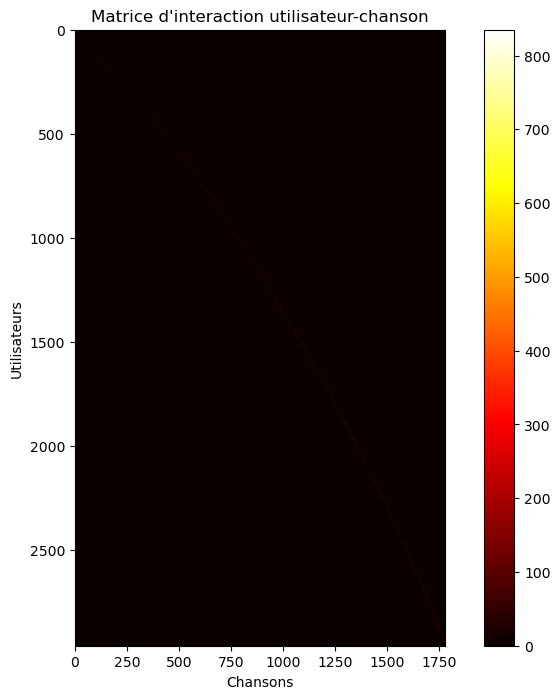

In [17]:
# Sélectionner les colonnes pertinentes pour la matrice d'interaction
df_interaction = df_1[['user', 'song_name', 'artist_name']]

# Créer la matrice d'interaction en utilisant la fonction pivot_table
interaction_matrix = df_interaction.pivot_table(index='user', columns='song_name', values='artist_name', fill_value=0)


# Afficher la matrice d'interaction en tant que heatmap
plt.figure(figsize=(10, 8))
plt.imshow(interaction_matrix, cmap='hot')
plt.colorbar()
plt.xlabel('Chansons')
plt.ylabel('Utilisateurs')
plt.title('Matrice d\'interaction utilisateur-chanson')
plt.show()


In [18]:
import pandas as pd
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import svds

interaction_matrix_float = interaction_matrix.astype(float)

# Conversion de la matrice d'utilité en une matrice creuse COO
utility_matrix_sparse = coo_matrix(interaction_matrix_float.values)

# Application de la décomposition en valeurs singulières (SVD)
U, S, V = svds(utility_matrix_sparse, k=20)  # k est le nombre de dimensions latentes

# Affichage les dimensions des matrices U, S et V
print('Dimensions de U:', U.shape)
print('Dimensions de S:', S.shape)
print('Dimensions de V:', V.shape)


Dimensions de U: (2960, 20)
Dimensions de S: (20,)
Dimensions de V: (20, 1778)


In [19]:
print("Ces dimensions indiquent que nous avons extrait 20 dimensions latentes à partir de la matrice d'utilité. La dimension de la matrice d'utilité initiale était (2960, 1778) avec 2960 utilisateurs et 2960 morceaux. La décomposition en valeurs singulières nous permet de représenter les utilisateurs et les morceaux dans un espace de dimension réduit en utilisant ces 20 dimensions latentes.")

Ces dimensions indiquent que nous avons extrait 20 dimensions latentes à partir de la matrice d'utilité. La dimension de la matrice d'utilité initiale était (2960, 1778) avec 2960 utilisateurs et 2960 morceaux. La décomposition en valeurs singulières nous permet de représenter les utilisateurs et les morceaux dans un espace de dimension réduit en utilisant ces 20 dimensions latentes.


In [20]:
# Réduction de la dimension de la matrice Σ en ne conservant que les valeurs singulières
# Spécification du  nombre de valeurs singulières à conserver
k = 20

# Tronquer les valeurs singulières en ne conservant que les k valeurs les plus importantes
S_truncated = np.diag(S[:k])

# Afficher les dimensions de la matrice tronquée
print('Dimensions de S_truncated:', S_truncated.shape)

Dimensions de S_truncated: (20, 20)


In [22]:
# Réduction de dimension en ne conservant que les k dimensions latentes les plus importantes
k = 20
U_truncated = U[:, :k]
V_truncated = V[:k, :]

# Reconstruction de la matrice d'utilité
utility_matrix_reconstructed = np.dot(np.dot(U_truncated, S_truncated), V_truncated)

# Affichage des dimensions de la matrice d'utilité reconstruite
print('Dimensions de utility_matrix_reconstructed:', utility_matrix_reconstructed.shape)


Dimensions de utility_matrix_reconstructed: (2960, 1778)


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcul de la similarité cosinus entre les morceaux de la matrice d'utilité reconstruite
similarity_matrix = cosine_similarity(utility_matrix_reconstructed)

#  indices des morceaux déjà appréciés par l'utilisateur
user_id = 'user'  ## Identifiant de l'utilisateur
user_likes = df_1.loc[df_1['user'] == user_id, 'song_name'].index.tolist()

# Génération  des recommandations musicales en fonction de la similarité
recommendations = []
for song_index in user_likes:
    #  les indices des morceaux similaires en fonction de la similarité cosinus
    similar_songs_indices = np.argsort(similarity_matrix[song_index])[::-1]

    #  les morceaux recommandés en excluant ceux déjà appréciés par l'utilisateur
    recommended_songs = [song for song in similar_songs_indices if song not in user_likes]

    # Ajout des morceaux recommandés à la liste de recommandations, # Exemple : sélectionner les 5 meilleurs morceaux recommandés
    recommendations.extend(recommended_songs[:5])  

#Afficher les recommandations musicales
print('Recommandations musicales pour l\'utilisateur', user_id, ':')
for song_index in recommendations:
    song_name = df_1.loc[song_index, 'song_name']
    artist_name = df_1.loc[song_index, 'artist_name']
    print(f"- {song_name} par {artist_name}")

Recommandations musicales pour l'utilisateur user :


In [45]:
user_likes_present = df_1['song_name'].isin(user_likes)
user_likes_present

2587424    False
288571     False
3331072    False
3627580    False
2028614    False
           ...  
3558370    False
1749471    False
1382357    False
1845738    False
3240136    False
Name: song_name, Length: 3000, dtype: bool

In [46]:
user_likes_in_similarity_matrix = user_likes_present.all()
user_likes_in_similarity_matrix

False